In [1]:
from pandas.io.gbq import read_gbq

In [2]:

from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## main questions: is there any corrlation between park coverage of a zipcode and the median rent? is there any correlation between subway stop count in a zipcode and median rent?

In [3]:
#read in zillow data by zipcode
project = "spheric-crow-161317"
studio = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio` "
onebr   = "SELECT * FROM    `smart_cities_data.median_rents_zipcode_1br`"
twobr = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"

dfstudio = read_gbq(query=studio, project_id=project, dialect='standard')
dfonebr = read_gbq(query=onebr, project_id=project, dialect='standard')
dftwobr = read_gbq(query=twobr, project_id=project, dialect='standard')


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 87 rows.

Total time taken 1.44 s.
Finished at 2017-03-26 13:28:38.


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 424 rows.

Total time taken 1.46 s.
Finished at 2017-03-26 13:28:42.


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 619 rows.

Total time taken 1.78 s.
Finished at 2017-03-26 13:28:44.


In [29]:
dfstudio.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
0,92101,San Diego,CA,San Diego,San Diego,37,NaN,NaN,NaN,NaN,...,1735.0,1755,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0
1,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,1150.0,1145,1150.0,1125.0,1095.0,1095.0,1095.0,1095.0,1150.0,1170.0
2,90005,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,54,NaN,NaN,NaN,NaN,...,1235.0,1185,1195.0,1200.0,1295.0,1272.5,1262.5,1350.0,1325.0,1325.0
3,60625,Chicago,IL,Chicago,Cook,20,NaN,NaN,NaN,NaN,...,995.0,950,950.0,995.0,950.0,895.0,875.0,850.0,875.0,950.0
4,11221,New York,NY,New York,Kings,28,NaN,NaN,NaN,NaN,...,1630.0,1630,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0


In [4]:
#read in parks data
parks =  gpd.GeoDataFrame.from_file("NYC_shapefiles/Parks Properties.geojson")

In [7]:
parks.head()


,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,(POLYGON ((-73.94806058617907 40.7558921243117...,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((-73.78243845176827 40.8440889832096...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((-73.83638471337602 40.5780595390407...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((-73.87623969625949 40.8419878695552...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,(POLYGON ((-73.93623823248316 40.7692821829763...,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


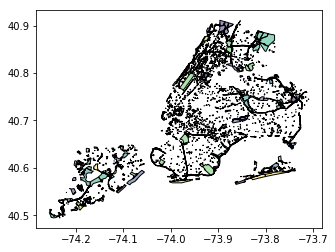

In [5]:
parks.plot()

In [6]:
#convert to new york specific flattened projection
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

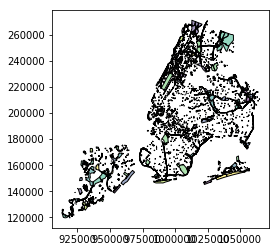

In [7]:
park_proj.plot()

In [25]:
from geopy.distance import vincenty

In [123]:
#read in zipcode shape files
zipcodes = gpd.GeoDataFrame.from_file("NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

## filter the zillow data for new york city  and add apartment type

In [9]:
dfstudio['apt_kind'] = 0
dfonebr['apt_kind'] = 1
dftwobr['apt_kind'] = 2

## combine all the data then filter for nyc

In [10]:
dfstudio.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,20009,Washington,DC,Washington,District of Columbia,19,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0


In [11]:
dfonebr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_04,_2010_05,_2010_06,_2010_07,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60601,Chicago,IL,Chicago,Cook,348,NaN,NaN,NaN,NaN,...,2093.0,2120.0,2156.0,2185.0,2085.0,2011.0,2017.5,1975.0,2000.0,1


In [12]:
dftwobr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60605,Chicago,IL,Chicago,Cook,383,NaN,NaN,NaN,NaN,...,2581.0,2570.0,2535.0,2600.0,2529.0,2500.0,2558.0,2600.0,2500.0,2


In [10]:
alldata = pd.concat([dfstudio, dfonebr, dftwobr])

In [14]:
alldata.head(2)

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,Washington,District of Columbia,Washington,20009,19,DC,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0
1,San Diego,San Diego,San Diego,92101,37,CA,NaN,NaN,NaN,NaN,...,1755.0,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0,0


In [124]:
zipcodes.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


## can we overlay zipcodes and parks and look at park area per zipcode

In [16]:
alldata.City.unique()

array([u'Washington', u'San Diego', u'Chicago', u'Seattle', u'New York',
       u'Saint Louis', u'Cambridge', u'Los Angeles', u'Austin',
       u'San Francisco', u'Denver', u'Arlington', u'Miami', u'Boston',
       u'Brookline', u'Philadelphia', u'Miami Beach', u'Atlanta',
       u'Union City', u'Houston', u'North Bethesda', u'Dallas', u'Orlando',
       u'Silver Spring', u'San Antonio', u'Jersey City', u'Newton',
       u'Plano', u'Fairfax', u'Grapevine', u'Irving', u'Hoboken',
       u'Richmond', u'Honolulu', u'Alexandria', u'Miramar', u'North Miami',
       u'Cedar Park', u'Waltham', u'Minneapolis', u'Woburn',
       u'Laguna Beach', u'Greenwood Village', u'Redmond', u'Kirkland',
       u'Mc Lean', u'Pflugerville', u'Providence', u'Charlotte',
       u'Sunnyvale', u'Foster City', u'La Mesa', u'Bloomington',
       u'Bethesda', u'Sandy Springs', u'Phoenix', u'Portland', u'Evanston',
       u'Fremont', u'San Jose', u'Omaha', u'Century Village',
       u'Newport News', u'Boulder', u'Ta

In [17]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


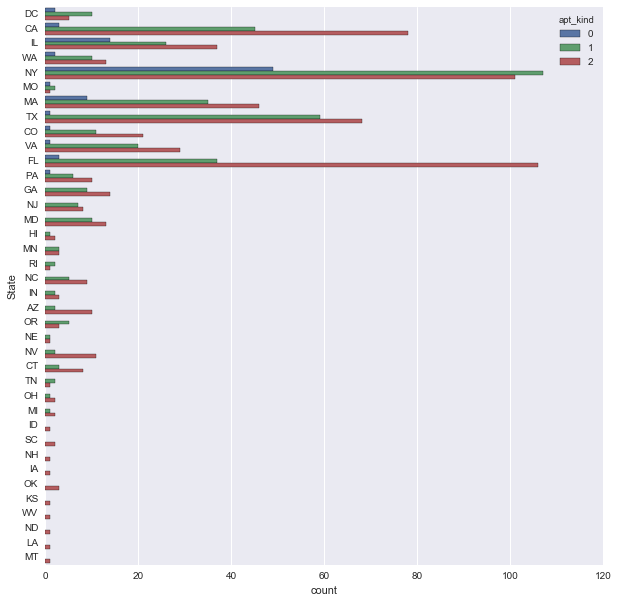

In [28]:
# look at count of apt type by state
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.countplot(y="State", hue="apt_kind", data=alldata)


In [11]:
dfny = alldata[alldata['State']=='NY']

In [19]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [31]:
zipcodes.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

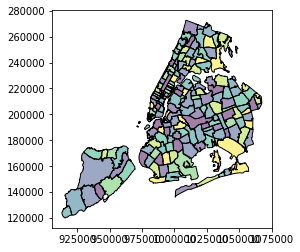

In [12]:
zipcodes.plot()

In [13]:
zipcodesproj = zipcodes.to_crs({'init': u'epsg:2263'})


In [14]:
zipcodesproj.crs


{'init': u'epsg:2263'}

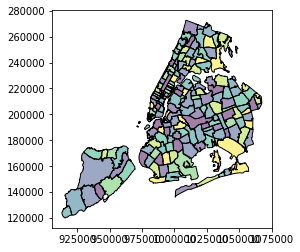

In [15]:
zipcodesproj.plot()

In [25]:
!pip install rtree

In [27]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [16]:
parkarea = park_proj.sort(['acres'], ascending = 0)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [17]:
parkarea['acres'] = [float(x) for x in parkarea['acres']]

## look at distribution of park acreage: looks like most are small with very few being large.

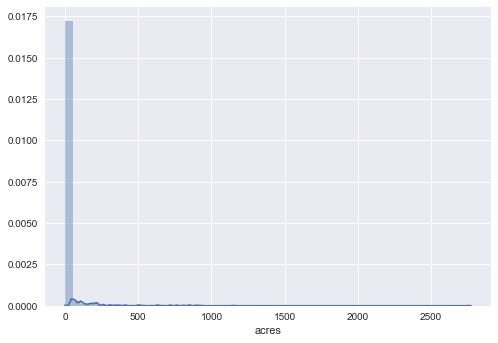

In [32]:

ax = sns.distplot(parkarea['acres'])

## should we filter by park kind and size before doing the intersection of parks and zipcodes? overlay is computationally intensive.

In [33]:
#are triangle/plazas small?
park_proj.typecatego.unique()

array([u'Community Park', u'Recreation Field/Courts', u'Triangle/Plaza',
       u'Garden', u'Neighborhood Park', u'Nature Area',
       u'Waterfront Facility', u'Historic House Park', u'Playground',
       u'Undeveloped', u'Buildings/Institutions', u'Flagship Park',
       u'Parkway', u'Jointly Operated Playground', u'Managed Sites',
       u'Lot', u'Strip', u'Cemetery', u'Mall'], dtype=object)

In [39]:
#look at size by type
typesize = park_proj[['typecatego','acres']]


In [40]:
typesize['acres'] = [float(x) for x in typesize['acres']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
typeg = typesize.groupby(['typecatego']).mean().reset_index()
typeg.columns = [['typecatego','mean_acres']]

In [50]:
typeg = typeg.sort(['acres'], ascending = 0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


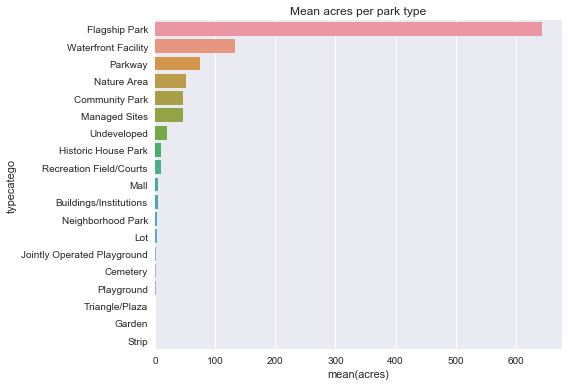

In [78]:
#mean acres for park type 
sns.plt.title('Mean acres per park type')
sns.barplot(x = 'acres', y='typecatego', data = typeg)
plt.tight_layout()
plt.savefig('mean_acres_park_type.png')

In [47]:
typecount = typesize.groupby(['typecatego']).size().reset_index()
typecount.columns = [['typecatego','count']]
typecount = typecount.sort(['count'],ascending = 0)
typecount.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,typecatego,count
4,Garden,344
16,Triangle/Plaza,338
11,Neighborhood Park,270
6,Jointly Operated Playground,267
13,Playground,228


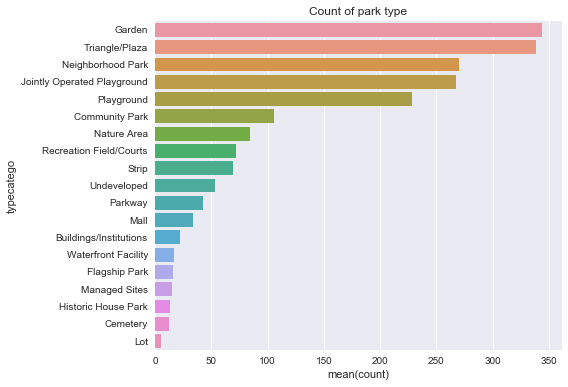

In [77]:
plt.title('Count of park type')
sns.barplot(x = 'count', y='typecatego', data = typecount)
plt.tight_layout()
plt.savefig('count_park_type.png')

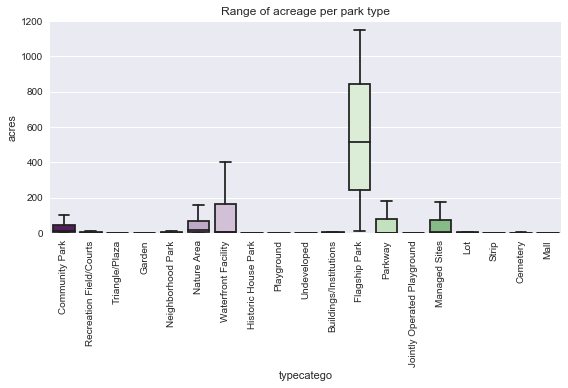

In [102]:
plt.title('Range of acreage per park type')
plt.xticks(rotation=90)
g = sns.boxplot(y="acres", x="typecatego",  data=park_proj, palette="PRGn")
plt.tight_layout()
g.set(ylim=(0, 1200))
plt.savefig("spread_acreage_parktype.png")
#outliers aren't shown, this is a seaborn issue i have to look into

## section below will not be used, sjoin is not good for intersection of shapefiles, but is good for intersection of points in a shape.

In [92]:
parkzip=  gpd.sjoin(park_proj, zipcodesproj, how = 'inner', op = 'intersects') #not using this for two shape file overlay

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2652: RuntimeWarning: invalid value encountered in find_intersects (vectorized)
  outputs = ufunc(*inputs)


In [93]:
parkzip.head() # this isn't a good way to join the data, better to use overlay

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,...,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE
0,20.340,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
30,10.000,52-10 CENTER BLVD,Q,402,26,(POLYGON ((995298.3666708043 209617.3311430861...,Q471,Center Blvd. bet. 50 Ave. and 54 Ave.,37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
327,0.218,35-01 STEINWAY STREET,Q,401,26,(POLYGON ((1005920.076070385 214300.3647560071...,Q296,35 Ave. bet. Steinway St. and 41 St.,30,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
436,0.518,5-32 49 AVENUE,Q,402,26,"(POLYGON ((996891.7939301427 210136.233648592,...",Q045,49 Ave. bet. 5 St. and Vernon Blvd.,37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101
908,2.524,11-01 45 ROAD,Q,402,26,"(POLYGON ((998721.944141224 211545.9647530107,...",Q141,"45 Ave., 45 Rd. bet. 11 St. and 21 St.",37,12,...,Queens,081,26254.0,Long Island City,0.0,0.0,NY,36,http://www.usps.com/,11101


In [104]:
parkzip['area'] = park_proj.area

In [29]:
zipcodesproj['area'] = zipcodesproj.area

In [117]:
zipshort = zipcodesproj[['area','ZIPCODE']]
zipshort.columns = [['ziparea','ZIPCODE']]

In [119]:
parkzipshort = parkzip[['area','ZIPCODE']]
parkzipshort.columns = [['parkoverlayarea','ZIPCODE']]

In [128]:
parkzipshort['parkoverlayarea'] = [float(x) for x in parkzipshort['parkoverlayarea']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
joined = zipshort.merge(parkzipshort, how = 'outer', on = ['ZIPCODE'])

In [121]:
joined.head()

,ziparea,ZIPCODE,parkoverlayarea
0,2.269930e+07,11436,278864.949564
1,2.269930e+07,11436,2569.569535
2,2.269930e+07,11436,60478.400009
3,2.269930e+07,11436,52493.607616
4,2.963100e+07,11213,61176.266886


In [122]:
joined['percentpark'] = joined['parkoverlayarea']/joined['ziparea']

In [123]:
joined.head()

,ziparea,ZIPCODE,parkoverlayarea,percentpark
0,2.269930e+07,11436,278864.949564,0.012285
1,2.269930e+07,11436,2569.569535,0.000113
2,2.269930e+07,11436,60478.400009,0.002664
3,2.269930e+07,11436,52493.607616,0.002313
4,2.963100e+07,11213,61176.266886,0.002065


In [131]:
joinedshort = joined[['ZIPCODE', 'parkoverlayarea']]

In [132]:
joinedshort = joined[['ZIPCODE', 'parkoverlayarea']]
joinedshortg = joinedshort.groupby(['ZIPCODE']).sum().reset_index()

In [133]:
joinedshortg.head()

,ZIPCODE,parkoverlayarea
0,00083,3.656768e+07
1,10001,5.416495e+05
2,10002,3.813254e+06
3,10003,5.789359e+05
4,10004,4.168394e+06


In [134]:
joined = joinedshortg.merge(zipshort,on = ['ZIPCODE'], how = 'left')

In [135]:
joined.head()

,ZIPCODE,parkoverlayarea,ziparea
0,00083,3.656768e+07,3.830099e+07
1,10001,5.416495e+05,1.779494e+07
2,10002,3.813254e+06,2.628013e+07
3,10003,5.789359e+05,1.553838e+07
4,10004,4.168394e+06,4.002521e+06


In [136]:
joined['percentpark'] = joined['parkoverlayarea']/joined['ziparea']

In [137]:
joined.head()

,ZIPCODE,parkoverlayarea,ziparea,percentpark
0,00083,3.656768e+07,3.830099e+07,0.954745
1,10001,5.416495e+05,1.779494e+07,0.030438
2,10002,3.813254e+06,2.628013e+07,0.145100
3,10003,5.789359e+05,1.553838e+07,0.037258
4,10004,4.168394e+06,4.002521e+06,1.041442


In [95]:
#does the park json show parks perfectly in a single zip code? this would be weird
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.340,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.100,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.440,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [18]:
parkacres = park_proj[['acres','zipcode']]

In [19]:
parksum = parkacres.groupby(['zipcode']).sum().reset_index()
parksum.head()#can't do simple zipcode join, parks span many zipcodes

,zipcode,acres
0,10001,0.210.1443.90.60.385
1,"10001, 10011, 10014",6.73
2,"10001, 10018",2.148
3,10002,0.4511.2940.1357.851.2540.681.4510.1222.612.32...
4,10003,0.7636.510.7183.9280.6420.0720.2670.0610.1920....


In [24]:
gpd.__version__

u'0.2.1'

In [80]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [83]:
#quick look at neighborhood data
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_studio` "

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Processed: 42.1 kb

Retrieving results...
Got 81 rows.

Total time taken 2.66 s.
Finished at 2017-03-25 16:08:03.


In [84]:
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_10,_2010_11,_2010_12,_2011_01,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
0,Downtown,San Francisco,CA,San Francisco,San Francisco,52,NaN,NaN,NaN,NaN,...,2197.5,2195.0,2200.0,2400.0,2250.0,1995.0,2195.0,2145.0,2045.0,2197.5
1,Westlake,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,14,NaN,NaN,NaN,NaN,...,1050.0,1100.0,1050.0,1062.5,1150.0,1112.5,1097.5,1137.5,1150.0,1150.0
2,Downtown,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,32,NaN,NaN,NaN,NaN,...,2070.0,2010.0,2015.0,1953.0,2048.0,2088.5,2070.0,1985.0,2032.5,2047.5
3,Koreatown,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,13,NaN,NaN,NaN,NaN,...,1197.5,1162.5,1195.0,1195.0,1212.5,1200.0,1199.0,1299.0,1200.0,1250.0
4,Dupont Circle,Washington,DC,Washington,District of Columbia,62,NaN,NaN,NaN,NaN,...,2040.0,1880.0,1915.0,1935.0,2069.0,1945.0,1940.0,1950.0,1915.0,1883.0


In [85]:
dfnynh = df[df['State']=='NY']
dfnynh.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_10,_2010_11,_2010_12,_2011_01,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
37,East Harlem,New York,NY,New York,New York,11,NaN,NaN,NaN,NaN,...,2650.0,2695.0,2650.0,2650.0,2695.0,2672.5,2700.0,2700.0,2650.0,2700.0
38,Bedford Stuyvesant,New York,NY,New York,Kings,6,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1750.0,1800.0,1725.0,1800.0,1899.5,1895.0,1662.5,1750.0
39,Crown Heights,New York,NY,New York,Kings,8,NaN,NaN,NaN,NaN,...,1600.0,1795.0,1699.0,1700.0,1695.0,1650.0,1700.0,1753.0,1650.0,1850.0
40,Forest Hills,New York,NY,New York,Queens,18,NaN,NaN,NaN,NaN,...,1525.0,1504.0,1550.0,1650.0,1575.0,1600.0,1550.0,1550.0,1525.0,1550.0
41,Williamsburg,New York,NY,New York,Kings,5,NaN,NaN,NaN,NaN,...,2700.0,2600.0,2645.0,2715.0,2600.0,2600.0,2748.0,2600.0,2600.0,2900.0


In [86]:
dfnynh.RegionName.unique()

array([u'East Harlem', u'Bedford Stuyvesant', u'Crown Heights',
       u'Forest Hills', u'Williamsburg', u'Flushing', u'Hunters Point',
       u'Downtown', u'Flatbush', u'Murray Hill', u'Upper West Side',
       u'Tudor City', u'Turtle Bay', u'East Village', u'Brooklyn Heights',
       u'Fort Greene', u'West Village', u'Jackson Heights', u'Elmhurst',
       u'Columbus Circle', u'Lower East Side', u'Washington Heights',
       u'Clinton', u'Chelsea', u'Greenwich Village', u'Astoria',
       u'Tribeca', u'Jamaica', u'Garment District', u'Financial District',
       u'Flatiron District', u'Clinton Hill', u'Sunnyside',
       u'Sutton Place', u'Rego Park', u'Harlem', u'Upper East Side',
       u'Battery Park', u'Fort Hamilton', u'Gramercy', u'Midtown'], dtype=object)

In [87]:
len(dfnynh.RegionName.unique())

41

In [88]:
dfny.RegionName.unique()

array([10458, 11205, 11221, 11102, 10038, 11235, 10018, 11355, 11109,
       10029, 10001, 10069, 11216, 11104, 11432, 10036, 10013, 11226,
       11238, 11106, 11375, 11374, 11211, 11101, 11209, 10021, 10005,
       11372, 10006, 10014, 10022, 10024, 10010, 11373, 10128, 10003,
       10075, 10019, 11201, 10017, 10016, 10023, 10009, 10002, 10025,
       10028, 10012, 10011, 10065, 10007, 10282, 10026, 11212, 11415,
       11377, 11105, 10004, 10468, 10467, 10452, 11418, 11204, 11206,
       11249, 11358, 10466, 11231, 10805, 10472, 11367, 11222, 11237,
       10701, 11228, 10032, 10462, 10461, 11217, 10040, 11354, 11220,
       10033, 11232, 11435, 11213, 11225, 10027, 11215, 11561, 10031,
       10280, 10453, 11368, 10463, 11223, 11230, 10457, 11210, 11214,
       11203, 11233, 10030, 10037, 11103, 11218, 10035, 11229, 10034,
       12065, 11234, 12180, 11361, 11236, 11385, 11207])

In [90]:
len(dfny)

257

## get rid of small parks and start over using geopandas overlay


In [45]:
park_proj['acres'] = [float(x) for x in park_proj['acres']]
park_proj = park_proj.sort(['acres'], ascending = 0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [46]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
1841,2771.747,None,X,"210, 212","12,13","(POLYGON ((1035312.05600022 262851.032418263, ...",X039,"Hutchinson River, Long Island Sound bet. Bronc...",None,None,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
1828,1146.430,3545 JEROME AVENUE,X,"207, 208, 212",11,(POLYGON ((1014952.519947719 267799.2797395985...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,Van Cortlandt Park,Flagship Park,16,No,"10467, 10470, 10471, 10705, 10705"
1435,920.426,None,R,"502, 503","50,51",(POLYGON ((936985.9166948968 143792.0457991689...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,Freshkills Park,Undeveloped,11,Yes,"10312, 10314"
1912,897.690,None,Q,"403, 404, 406, 407, 408","19,20,21,24",(POLYGON ((1032238.971595229 200857.0504353404...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes,"11354, 11355, 11367, 11368"
464,843.970,1001 RICHMOND HILL ROAD,R,"502, 503","50,51",(POLYGON ((943611.4080370538 148424.3301697549...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,LaTourette Park & Golf Course,Flagship Park,11,No,"10306, 10314"


In [142]:
len(park_proj)

2008

In [47]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
1841,2771.747,None,X,"210, 212","12,13","(POLYGON ((1035312.05600022 262851.032418263, ...",X039,"Hutchinson River, Long Island Sound bet. Bronc...",None,None,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
1828,1146.430,3545 JEROME AVENUE,X,"207, 208, 212",11,(POLYGON ((1014952.519947719 267799.2797395985...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,Van Cortlandt Park,Flagship Park,16,No,"10467, 10470, 10471, 10705, 10705"
1435,920.426,None,R,"502, 503","50,51",(POLYGON ((936985.9166948968 143792.0457991689...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,Freshkills Park,Undeveloped,11,Yes,"10312, 10314"
1912,897.690,None,Q,"403, 404, 406, 407, 408","19,20,21,24",(POLYGON ((1032238.971595229 200857.0504353404...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes,"11354, 11355, 11367, 11368"
464,843.970,1001 RICHMOND HILL ROAD,R,"502, 503","50,51",(POLYGON ((943611.4080370538 148424.3301697549...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,LaTourette Park & Golf Course,Flagship Park,11,No,"10306, 10314"


In [48]:
#take top 100 parks
top100 = park_proj[:100]

In [49]:
top100.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
1841,2771.747,None,X,"210, 212","12,13","(POLYGON ((1035312.05600022 262851.032418263, ...",X039,"Hutchinson River, Long Island Sound bet. Bronc...",None,None,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803"
1828,1146.430,3545 JEROME AVENUE,X,"207, 208, 212",11,(POLYGON ((1014952.519947719 267799.2797395985...,X092,"NYC - Westchester County Line, Van Cortlandt P...",81,34,Van Cortlandt Park,Flagship Park,16,No,"10467, 10470, 10471, 10705, 10705"
1435,920.426,None,R,"502, 503","50,51",(POLYGON ((936985.9166948968 143792.0457991689...,R017,"Victory Blvd., W. Shore Exwy., Richmond Ave. b...",63,24,Freshkills Park,Undeveloped,11,Yes,"10312, 10314"
1912,897.690,None,Q,"403, 404, 406, 407, 408","19,20,21,24",(POLYGON ((1032238.971595229 200857.0504353404...,Q099,"Grand Central Pkwy., Whitestone Exwy. bet. 111...","35, 25, 40","13, 15, 16",Flushing Meadows Corona Park,Flagship Park,"6, 14",Yes,"11354, 11355, 11367, 11368"
464,843.970,1001 RICHMOND HILL ROAD,R,"502, 503","50,51",(POLYGON ((943611.4080370538 148424.3301697549...,R013,"Forest Hill Rd., London Rd., Rockland Ave., Ar...",63,24,LaTourette Park & Golf Course,Flagship Park,11,No,"10306, 10314"


## just including top 100 largest parks. other methods could be sorting out by park type etc.

In [50]:
intersect = gpd.overlay(zipcodesproj, top100, how = 'intersection' )

Ring Self-intersection at or near point 1040135.4065897184 258809.69174767172
Ring Self-intersection at or near point 1035524.9066243942 249020.90883183986
Ring Self-intersection at or near point 1015202.8603263077 263437.72415827191
Ring Self-intersection at or near point 1024092.7969427273 178946.17955901165
Ring Self-intersection at or near point 1028849.3264716436 245229.30224184168


In [229]:
list(intersect.columns.values)

[u'AREA',
 u'BLDGZIP',
 u'COUNTY',
 u'CTY_FIPS',
 u'POPULATION',
 u'PO_NAME',
 u'SHAPE_AREA',
 u'SHAPE_LEN',
 u'STATE',
 u'ST_FIPS',
 u'URL',
 u'ZIPCODE',
 'area',
 u'acres',
 u'address',
 u'borough',
 u'communityb',
 u'councildis',
 u'gispropnum',
 u'location',
 u'nys_assemb',
 u'nys_senate',
 u'signname',
 u'typecatego',
 u'us_congres',
 u'waterfront',
 u'zipcode',
 'geometry',
 'overlayarea']

In [230]:
del intersect['area']

In [51]:
intersect['overlayarea'] = intersect['geometry'].area

In [52]:
#have to group by zipcode and sum
intersectshort = intersect[['ZIPCODE','overlayarea']]
intersectshort['overlayarea'] = [float(x) for x in intersectshort['overlayarea']]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [53]:
intersectshort.head()

,ZIPCODE,overlayarea
0,10307,5.698711e+06
1,10309,9.986967e+05
2,10309,1.661538e+06
3,10309,8.259212e+04
4,10309,4.865125e+05


In [54]:
intersectshort['ZIPCODE'] = [str(x) for x in intersectshort['ZIPCODE']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
intersectshort = intersect[['ZIPCODE','overlayarea']]

In [56]:

joinedg = intersectshort.groupby(['ZIPCODE']).sum().reset_index()

In [57]:
zipshort = zipcodesproj[['ZIPCODE','area']]

In [58]:
top100percent = joinedg.merge(zipshort, how = 'left', on = ['ZIPCODE'])

In [59]:
top100percent.head()

,ZIPCODE,overlayarea,area
0,00083,3.653497e+07,3.830099e+07
1,10023,7.860299e+05,1.521271e+07
2,10024,7.894028e+06,2.287734e+07
3,10025,2.709851e+05,1.963104e+07
4,10032,5.008772e+06,2.315957e+07


In [60]:
top100percent['overlayarea'] = [float(x) for x in top100percent['overlayarea']]
top100percent['area'] = [float(x) for x in top100percent['area']]

In [61]:
top100percent['percentoverlay'] = top100percent['overlayarea']/ top100percent['area']

In [62]:
top100percent = top100percent.sort(['percentoverlay'], ascending = 0)
top100percent.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ZIPCODE,overlayarea,area,percentoverlay
35,10464,7.081160e+07,4.512530e+06,15.692215
48,11096,1.126189e+06,1.119738e+05,10.057609
36,10464,7.081160e+07,1.158795e+07,6.110794
67,11231,2.010920e+06,7.019794e+05,2.864642
111,11693,2.667215e+06,1.527599e+06,1.746018


In [63]:
top100percent.tail()

,ZIPCODE,overlayarea,area,percentoverlay
98,11421,62524.768365,2.431444e+07,0.002572
68,11233,67129.033742,3.787169e+07,0.001773
49,11103,21187.132892,2.022240e+07,0.001048
24,10452,16891.796261,2.755039e+07,0.000613
25,10454,89.851338,3.106361e+07,0.000003


## now join this to the rent data on zipcode and look for correlation

In [198]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1


In [214]:
topzip = top100percent.RegionName.unique()

In [218]:
sort(topzip)

array([u'00083', u'10023', u'10024', u'10025', u'10032', u'10033',
       u'10034', u'10035', u'10039', u'10040', u'10069', u'10301',
       u'10302', u'10303', u'10304', u'10305', u'10306', u'10307',
       u'10308', u'10309', u'10310', u'10312', u'10314', u'10452',
       u'10454', u'10456', u'10457', u'10458', u'10460', u'10461',
       u'10462', u'10463', u'10464', u'10465', u'10466', u'10467',
       u'10469', u'10470', u'10471', u'10472', u'10473', u'10475',
       u'11005', u'11096', u'11103', u'11105', u'11207', u'11208',
       u'11209', u'11213', u'11214', u'11215', u'11216', u'11218',
       u'11220', u'11223', u'11224', u'11225', u'11228', u'11229',
       u'11230', u'11231', u'11233', u'11234', u'11235', u'11236',
       u'11238', u'11239', u'11355', u'11356', u'11357', u'11359',
       u'11360', u'11361', u'11362', u'11363', u'11364', u'11365',
       u'11367', u'11368', u'11369', u'11370', u'11371', u'11375',
       u'11379', u'11385', u'11411', u'11413', u'11414', u'114

In [219]:
sort(dfny.RegionName.unique()) #one is string and one is int

array([10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010,
       10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10021,
       10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030,
       10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10040,
       10065, 10069, 10075, 10128, 10280, 10282, 10452, 10453, 10457,
       10458, 10461, 10462, 10463, 10466, 10467, 10468, 10472, 10701,
       10805, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201,
       11203, 11204, 11205, 11206, 11207, 11209, 11210, 11211, 11212,
       11213, 11214, 11215, 11216, 11217, 11218, 11220, 11221, 11222,
       11223, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233,
       11234, 11235, 11236, 11237, 11238, 11249, 11354, 11355, 11358,
       11361, 11367, 11368, 11372, 11373, 11374, 11375, 11377, 11385,
       11415, 11418, 11432, 11435, 11561, 12065, 12180])

In [264]:
top100percent.head()

,RegionName,overlayarea,ziparea,percentoverlay
35,10464,7.081160e+07,4.512530e+06,15.692215
48,11096,1.126189e+06,1.119738e+05,10.057609
36,10464,7.081160e+07,1.158795e+07,6.110794
67,11231,2.010920e+06,7.019794e+05,2.864642
111,11693,2.667215e+06,1.527599e+06,1.746018


In [64]:
top100percent.columns = [['RegionName', 'overlayarea','ziparea','percentoverlay']]

In [65]:
dfny['RegionName'] = [str(x) for x in dfny['RegionName']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
rentjoin100 = dfny.merge(top100percent, how = 'left', on = ['RegionName'])

In [67]:
rentjoin100.percentoverlay.unique()

array([  2.25992737e-01,              nan,   5.95563720e-02,
         1.13546180e-01,   2.52135668e-01,   4.98891315e-03,
         2.39448874e-02,   7.51048943e-02,   4.09896673e-02,
         6.96942843e-02,   3.45058876e-01,   5.16692770e-02,
         1.38039071e-02,   4.51847243e-02,   4.51926715e-02,
         1.28368467e-01,   6.13123760e-04,   3.94258244e-03,
         2.86464246e+00,   5.10648961e-02,   3.15758797e-02,
         2.30394080e-01,   2.07014063e-01,   2.16272290e-01,
         2.20214494e-01,   5.29939422e-02,   3.19204248e-01,
         1.31593189e-02,   1.46266148e-01,   1.10269845e-02,
         1.82818490e-02,   8.33752506e-03,   3.36709841e-01,
         3.26775333e-01,   3.00607084e-01,   2.55509023e-02,
         8.08712273e-03,   9.56086092e-03,   1.20674404e-01,
         8.69997788e-02,   1.77253846e-03,   1.04770639e-03,
         8.55017272e-03,   9.00290737e-01,   5.91856057e-01,
         5.29294797e-02,   3.23724624e-01,   2.14388554e-01,
         4.70515601e-02,

In [68]:
sns.lmplot(x="_2017_01", y="percentoverlay",  data=rentjoin100, size=7)
#seaborn disrupts normal plotting colors

NameError: name 'sns' is not defined

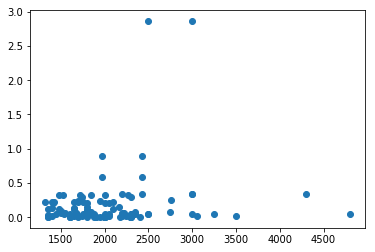

In [77]:
import matplotlib.pyplot as plt
import numpy as np
x = rentjoin100._2017_01.tolist()
y = rentjoin100.percentoverlay.tolist()
plt.scatter(x, y)
plt.show()

In [69]:

#no clear correlation for the top 100 zipcodes with the most park area and rent
rentjoin100[['percentoverlay','_2017_01']].corr()

,percentoverlay,_2017_01
percentoverlay,1.000000,0.196777
_2017_01,0.196777,1.000000


## plot of largest 100 parks

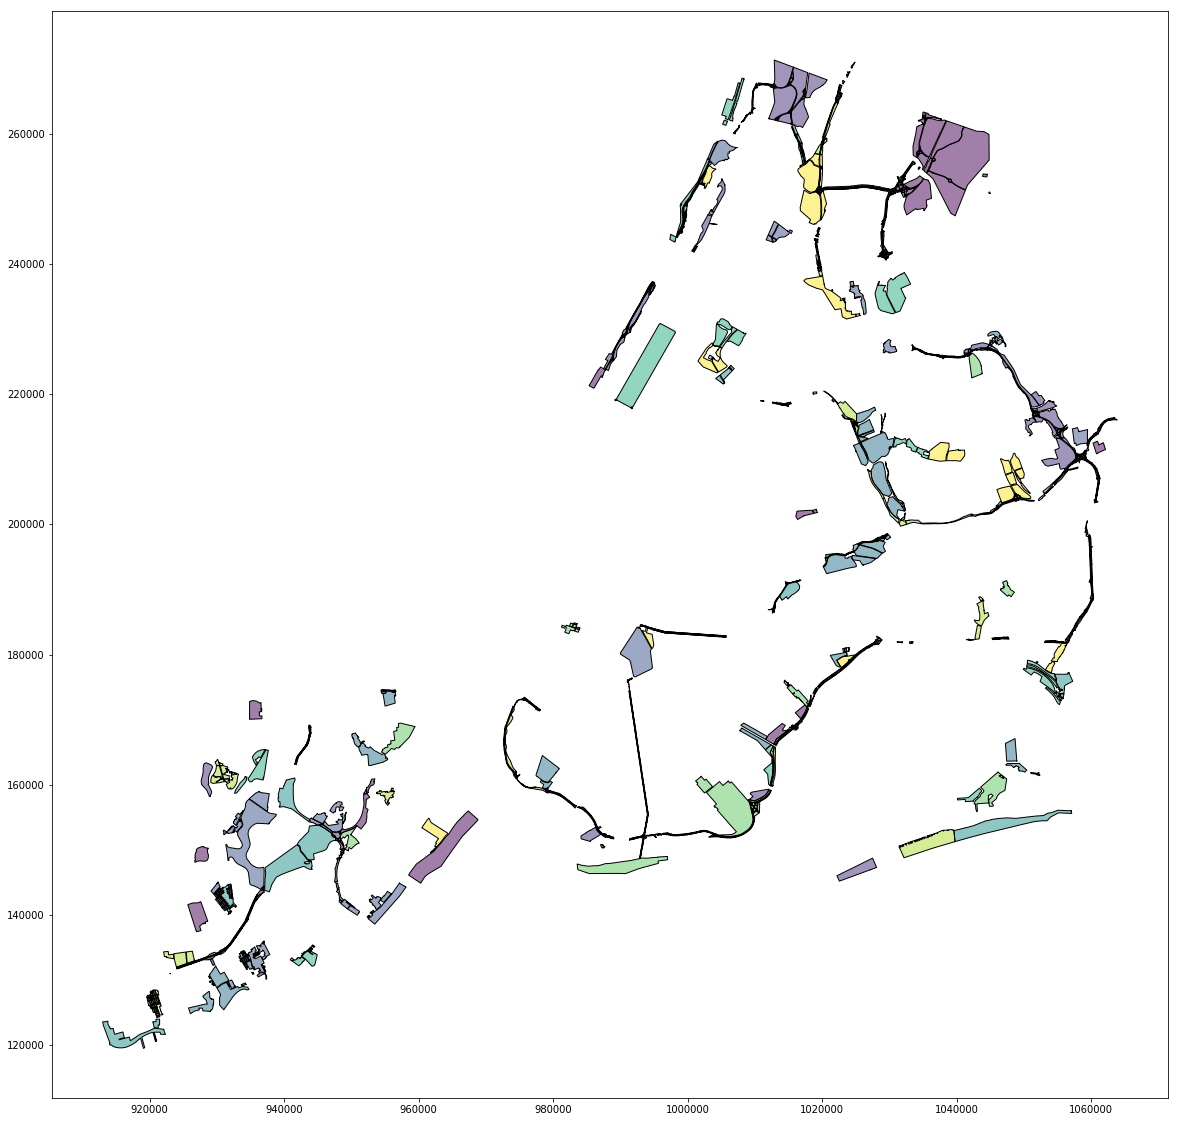

In [79]:
fig, ax = plt.subplots(figsize=(20, 20))
top100.plot(ax = ax) #surprised washington square park isn't here

In [71]:
#zipcodes of top 100 parks
intersectzips = intersect.ZIPCODE.unique()

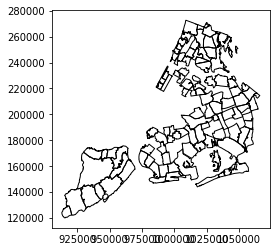

In [72]:
#just the zipcodes which include the largest parks (caveat is a small bit of a large park could be included )
zipcodesproj[zipcodesproj['ZIPCODE'].isin(intersectzips)].plot(facecolor='none')

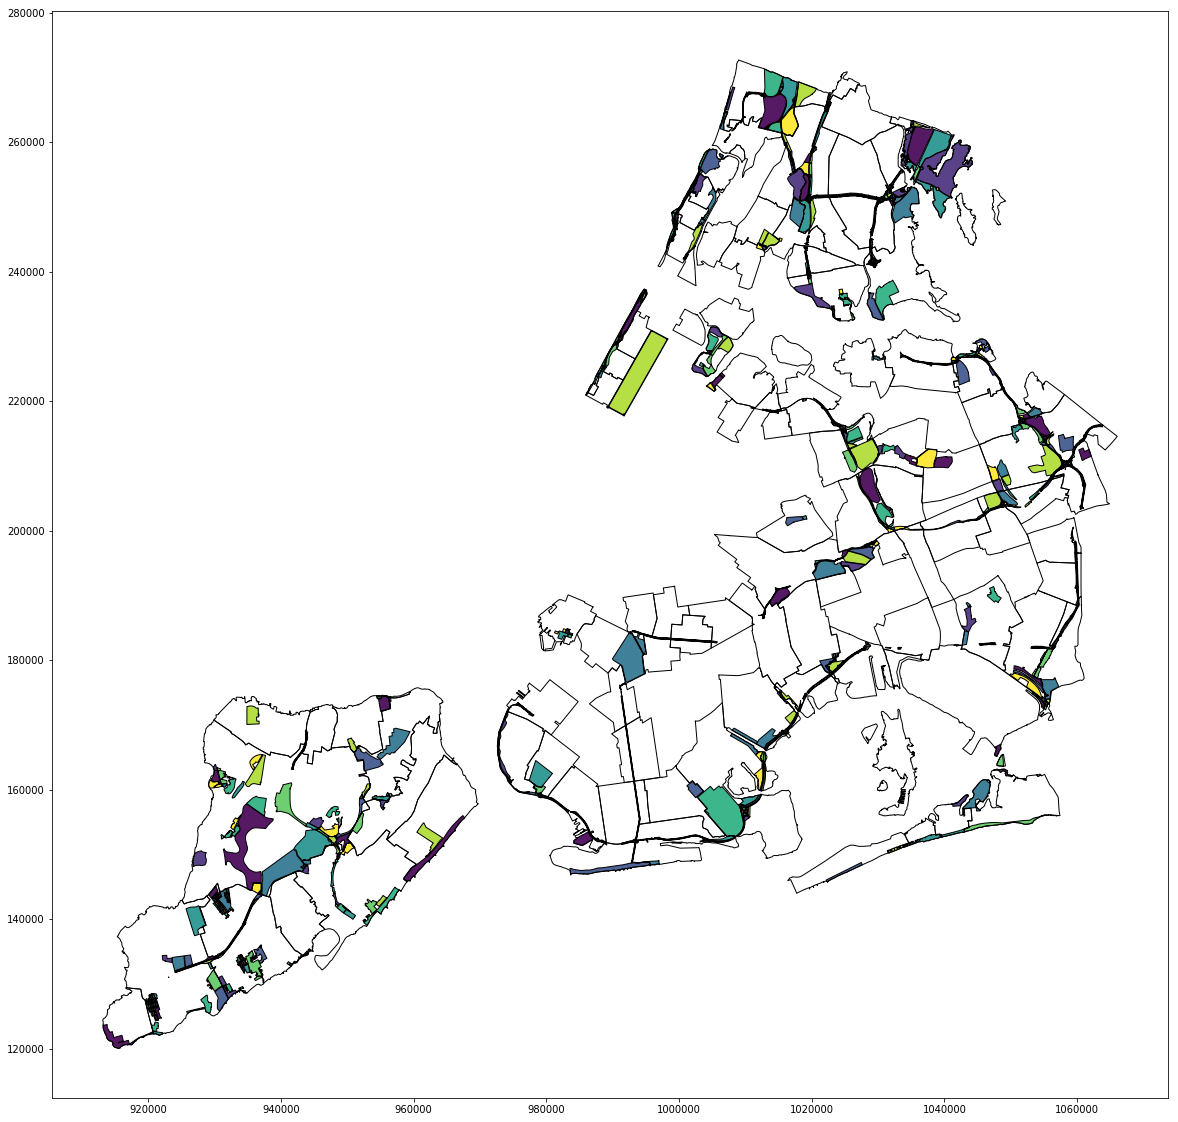

In [73]:
fig, ax = plt.subplots(figsize=(20, 20))
intersect.plot(ax=ax, alpha=0.9)
zipcodesproj[zipcodesproj['ZIPCODE'].isin(intersectzips)].plot(ax= ax, facecolor='none');
#overlay for top 100 parks, lower manhattan doesn't have many large parks but is expensive. so this is misleading.
#also looks like zipcodes touche but not including central park aren't counted. show deal with this.

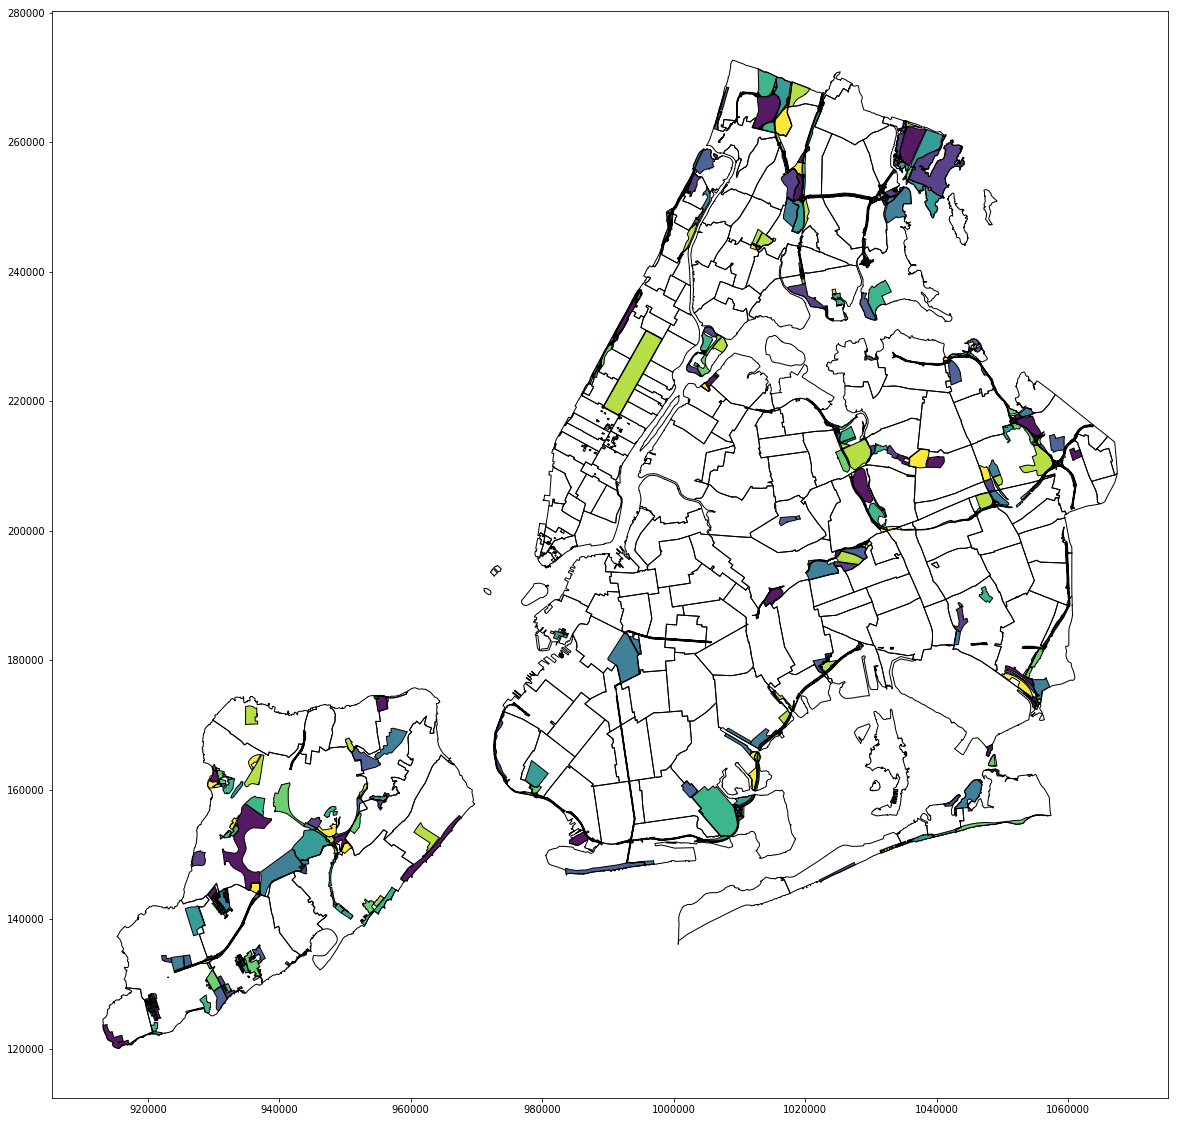

In [74]:
fig, ax = plt.subplots(figsize=(20, 20))
intersect.plot(ax=ax, alpha=0.9)
zipcodesproj.plot(ax= ax, facecolor='none');
#big parks all zipcodes
#overlay for top 100 parks, lower manhattan doesn't have many large parks but is expensive. so this is misleading.
#there are some super tiny zipcodes below central park

## new strategy, park or not? is there any difference? flawed because all our zipcodes in zillow have some kind of park, but how about park count or park type?

In [158]:
ziplist = park_proj.zipcode.unique()

In [162]:
allzips = []
for i in ziplist:
    if len(i) > 1:
        for j in i:
            if j not in allzips:
                allzips.append(j)
    else:
        if i not in allzips:
            allzips.append(i)

In [164]:
ziplist

array([u'10461, 10464, 10464, 10465, 10469, 10475, 10803',
       u'10467, 10470, 10471, 10705, 10705', u'10312, 10314',
       u'11354, 11355, 11367, 11368', u'10306, 10314',
       u'10023, 10024, 10025', u'11229, 11234, 11235',
       u'11208, 11209, 11214, 11223, 11228, 11234, 11235, 1',
       u'10458, 10460, 10462, 10467', u'10305, 10306',
       u'11361, 11362, 11363, 11364, 11426', u'11215',
       u'11375, 11385, 11415, 11421', u'11691, 11692', u'10465',
       u'11224, 11235', u'11692, 11693, 11694', u'11364, 11423, 11427',
       u'10301, 10304, 10306, 10309, 10312, 10314',
       u'11003, 11357, 11359, 11360, 11361, 11362, 11364, 1', u'10306',
       u'10309, 10312', u'10307, 10309', u'10035',
       u'11103, 11367, 11368, 11369, 11370, 11371, 11375', u'11365',
       u'10461, 10462, 10465, 10469, 10475', u'10312', u'11209, 11228',
       u'10314', u'10301',
       u'10460, 10466, 10467, 10470, 10472, 10473, 10704', u'10473',
       u'11413, 11414, 11420, 11430, 11434', u'1

In [165]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [166]:
def haspark(x):
    if i in ziplist:
        return 1
    else:
        return 0
dfny['haspark'] = [haspark(x) for x in dfny['RegionName']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [167]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1


In [168]:
dfny[dfny['haspark']==0] #looks like they all have a park of some kind

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark


In [169]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1


In [170]:
zipcount = pd.read_csv('clean-data/parkcounts_perzipcode.csv')

In [171]:
zipcount.head()

,ZIPCODE,parkcount
0,10122,0
1,10065,5
2,10069,1
3,10453,26
4,10452,36


In [172]:
zipcount.columns = [['RegionName', 'parkcount']]

In [174]:
countjoin = dfny.merge(zipcount, how = 'left', on = ['RegionName'])

In [175]:
countjoin.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind,haspark,parkcount
0,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0,1,15.0
1,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0,1,14.0
2,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0,1,22.0
3,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0,1,12.0
4,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0,1,11.0


In [176]:
joinshort = countjoin[['_2017_01','parkcount']]

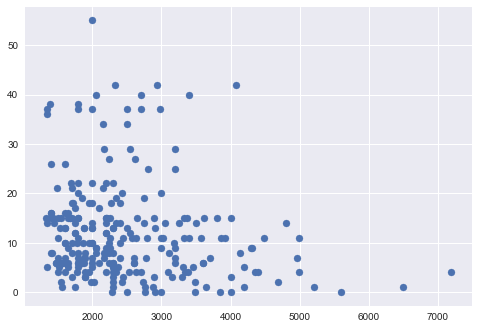

In [177]:
x = joinshort._2017_01.tolist()
y = joinshort.parkcount.tolist()
plt.scatter(x, y)

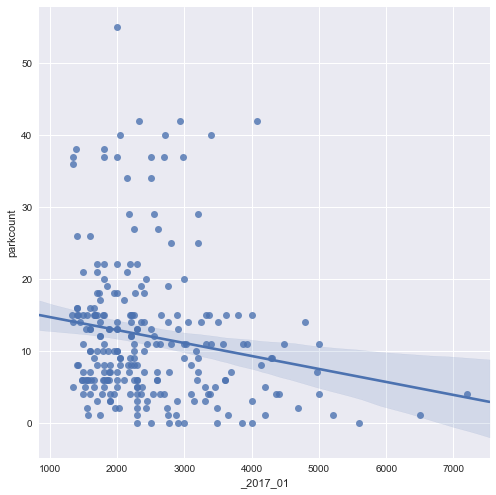

In [179]:
sns.lmplot(x="_2017_01", y="parkcount",  data=joinshort, size=7)

In [182]:
joinshort.corr()

,_2017_01,parkcount
_2017_01,1.000000,-0.173198
parkcount,-0.173198,1.000000


## before exploring more by park type or using neighborhoods, let's look at the subway stops

In [100]:
#read in mta stations

project = "spheric-crow-161317"
mta = "SELECT * FROM `smart_cities_data.NYC_MTA_stations`"


dfmta = read_gbq(query=mta, project_id=project, dialect='standard')


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 1868 rows.

Total time taken 1.73 s.
Finished at 2017-03-26 20:07:33.


In [101]:
dfmta.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location
0,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,None,False,7th Ave,18th St,SW,40.741081,-73.998105,"(40.74104, -73.997871)","(40.741081, -73.998105)"
1,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,None,False,7th Ave,18th St,SE,40.740920,-73.997698,"(40.74104, -73.997871)","(40.740920, -73.997698)"
2,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,None,False,7th Ave,18th St,NE,40.741015,-73.997580,"(40.74104, -73.997871)","(40.741015, -73.997580)"
3,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,None,False,7th Ave,18th St,NE,40.741617,-73.997197,"(40.74104, -73.997871)","(40.741617, -73.997197)"
4,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,None,False,7th Ave,18th St,NW,40.741783,-73.997557,"(40.74104, -73.997871)","(40.741783, -73.997557)"


In [102]:

#turn lat long into shapely points
dfmta.dropna(axis=0, subset=['Station_Latitude','Station_Longitude'], inplace=True)
dfmta['lonlat'] = list(zip(dfmta.Station_Longitude, dfmta.Station_Latitude))
dfmta['geometry'] = dfmta[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
dfmta.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location,lonlat,geometry
0,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SW,40.741081,-73.998105,"(40.74104, -73.997871)","(40.741081, -73.998105)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
1,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SE,40.740920,-73.997698,"(40.74104, -73.997871)","(40.740920, -73.997698)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
2,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741015,-73.997580,"(40.74104, -73.997871)","(40.741015, -73.997580)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
3,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741617,-73.997197,"(40.74104, -73.997871)","(40.741617, -73.997197)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
4,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NW,40.741783,-73.997557,"(40.74104, -73.997871)","(40.741783, -73.997557)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)


In [96]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
#this should do the same as above
geometry = [Point(xy) for xy in zip(dfmta.Station_Longitude, dfmta.Station_Latitude)]
#dfmta = dfmta.drop(['Station_Longitude', 'Station_Latitude'], axis=1)
crs = {'init': u'epsg:2263'}
geo_df = GeoDataFrame(dfmta, crs=crs, geometry=geometry)

In [125]:
subgdf = gpd.GeoDataFrame(dfmta)
subgdf.crs = {'init': u'epsg:2263'} ## noisegdf did not have a defined crs, but it is clearly in 4326: lat/lon
subgdf.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location,lonlat,geometry
0,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SW,40.741081,-73.998105,"(40.74104, -73.997871)","(40.741081, -73.998105)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
1,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SE,40.740920,-73.997698,"(40.74104, -73.997871)","(40.740920, -73.997698)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
2,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741015,-73.997580,"(40.74104, -73.997871)","(40.741015, -73.997580)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
3,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741617,-73.997197,"(40.74104, -73.997871)","(40.741617, -73.997197)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)
4,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NW,40.741783,-73.997557,"(40.74104, -73.997871)","(40.741783, -73.997557)","(-73.997871, 40.74104)",POINT (-73.997871 40.74104)


In [126]:
sub_proj = subgdf.to_crs({'init': u'epsg:2263'})

In [127]:
sub_proj.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location,lonlat,geometry
0,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SW,40.741081,-73.998105,"(40.74104, -73.997871)","(40.741081, -73.998105)","(-73.997871, 40.74104)",POINT (-73.99787100267098 40.74103993756213)
1,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,SE,40.740920,-73.997698,"(40.74104, -73.997871)","(40.740920, -73.997698)","(-73.997871, 40.74104)",POINT (-73.99787100267098 40.74103993756213)
2,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741015,-73.997580,"(40.74104, -73.997871)","(40.741015, -73.997580)","(-73.997871, 40.74104)",POINT (-73.99787100267098 40.74103993756213)
3,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NE,40.741617,-73.997197,"(40.74104, -73.997871)","(40.741617, -73.997197)","(-73.997871, 40.74104)",POINT (-73.99787100267098 40.74103993756213)
4,IRT,Broadway-7th Ave,18th St,40.74104,-73.997871,1,None,None,None,None,...,False,7th Ave,18th St,NW,40.741783,-73.997557,"(40.74104, -73.997871)","(40.741783, -73.997557)","(-73.997871, 40.74104)",POINT (-73.99787100267098 40.74103993756213)


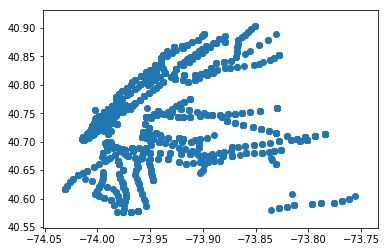

In [121]:
y = subgdf.Station_Latitude.tolist()
x = subgdf.Station_Longitude.tolist()
plt.scatter(x, y) #why does this look so weird?

In [113]:
subgdf.tail()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location,lonlat,geometry
1863,IRT,42nd St Shuttle,Grand Central,40.752769,-73.979189,GS,4,5,6,7,...,True,Park Ave,42nd St,SW,40.752184,-73.978048,"(40.752769, -73.979189)","(40.752184, -73.978048)","(-73.979189, 40.752769)",POINT (-73.97918900000001 40.752769)
1864,IRT,42nd St Shuttle,Grand Central,40.752769,-73.979189,GS,4,5,6,7,...,True,Madison Ave,42nd St,SW,40.752846,-73.979798,"(40.752769, -73.979189)","(40.752846, -73.979798)","(-73.979189, 40.752769)",POINT (-73.97918900000001 40.752769)
1865,IRT,42nd St Shuttle,Grand Central,40.752769,-73.979189,GS,4,5,6,7,...,True,Vanderbilt Ave,42nd St,NW,40.752717,-73.978487,"(40.752769, -73.979189)","(40.752717, -73.978487)","(-73.979189, 40.752769)",POINT (-73.97918900000001 40.752769)
1866,IRT,42nd St Shuttle,Grand Central,40.752769,-73.979189,GS,4,5,6,7,...,True,Vanderbilt Ave,42nd St,SE,40.752279,-73.978280,"(40.752769, -73.979189)","(40.752279, -73.978280)","(-73.979189, 40.752769)",POINT (-73.97918900000001 40.752769)
1867,IRT,42nd St Shuttle,Grand Central,40.752769,-73.979189,GS,4,5,6,7,...,True,Vanderbilt Ave,42nd St,SE,40.752218,-73.978396,"(40.752769, -73.979189)","(40.752218, -73.978396)","(-73.979189, 40.752769)",POINT (-73.97918900000001 40.752769)


In [128]:
zipcodes.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [132]:

import choroplethNYC as cp


(<matplotlib.figure.Figure at 0x147080490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x147080410>)

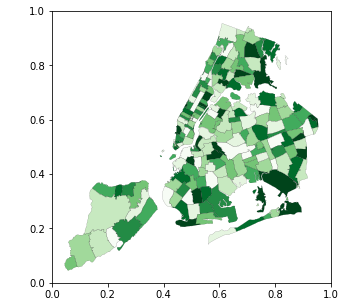

In [137]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.axis('off')

cp.choroplethNYC(zipcodes, cmap='Greens', ax=ax, cb=False, lw=0.1)


In [136]:
zipcodeproj= zipcodes.to_crs({'init': 'epsg:4326'} )

(<matplotlib.figure.Figure at 0x1482f26d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1482f24d0>)

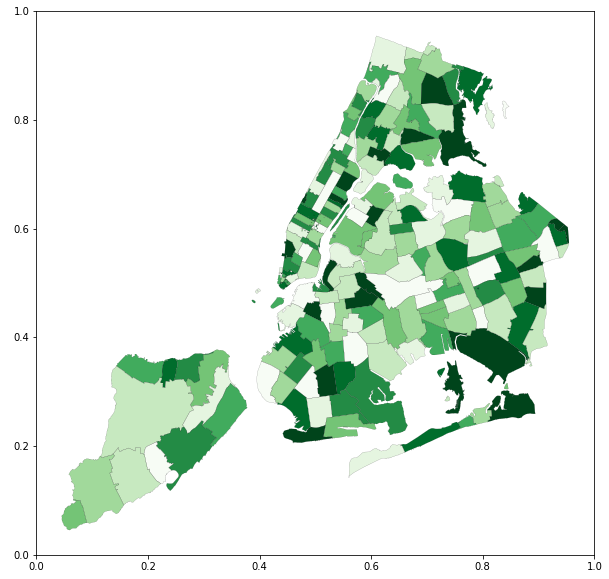

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.axis('off')

cp.choroplethNYC(zipcodeproj, cmap='Greens', ax=ax, cb=False, lw=0.1)


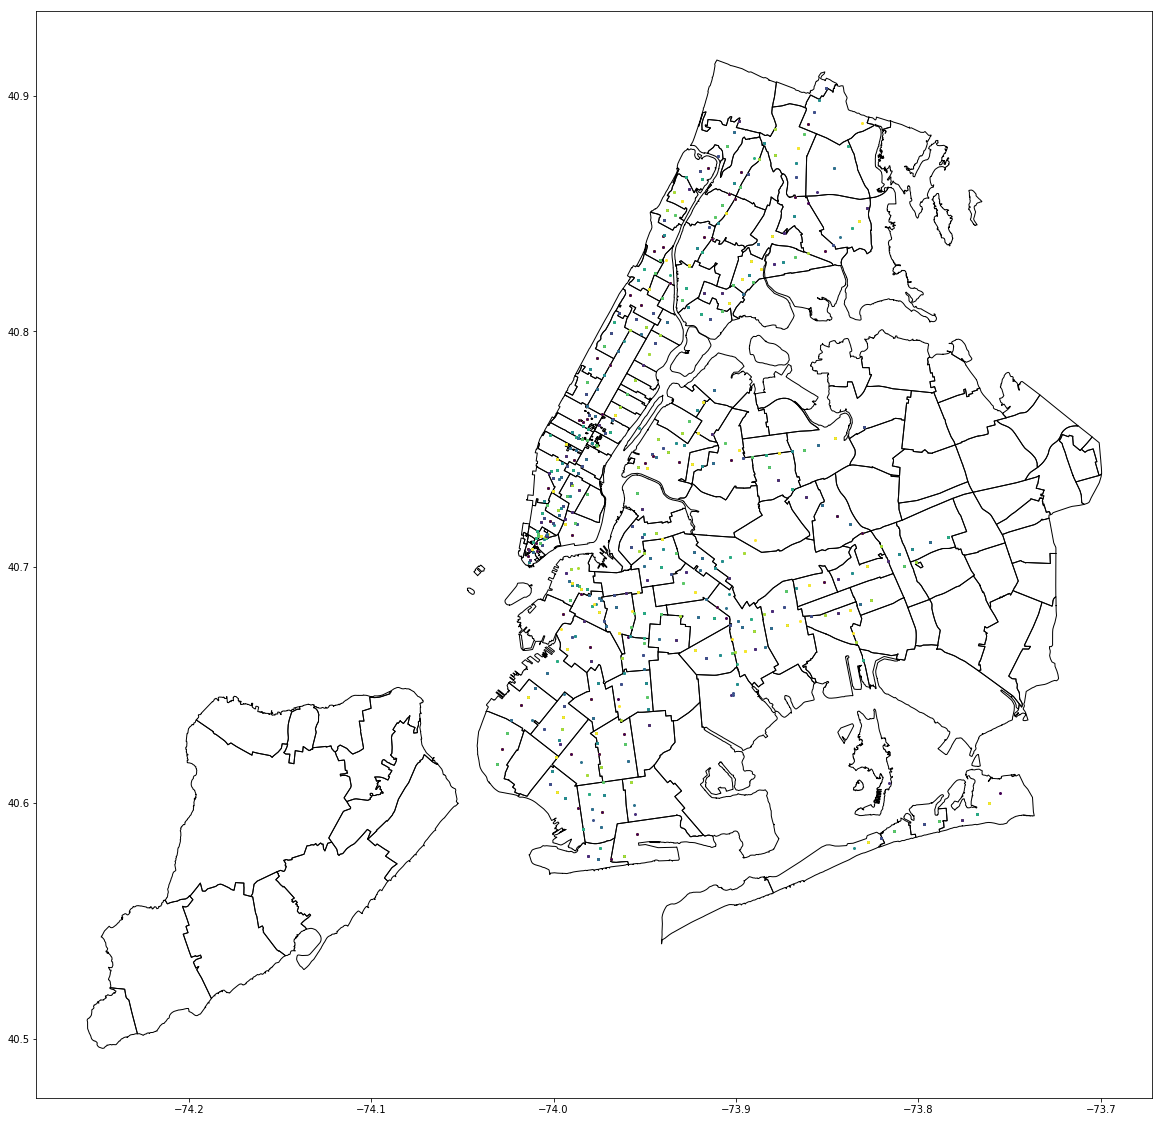

In [139]:
fig, ax = plt.subplots(figsize=(20, 20))
zipcodeproj.plot(ax=ax,facecolor='none' )
subgdf.plot(ax=ax) #whoo hoo!

In [107]:
parksubway=  gpd.sjoin(subgdf, park_proj, how = 'inner', op = 'intersects')

ValueError: need at least one array to concatenate